# Project 1 - EDA 
#### Mason Reyher, Jamison Cleveland, Kade Aldrich, Mitch Froelich, Ryley Ourada

Initial setup:

In [2]:
%pip install --upgrade pip -q
%pip install pandas -q
%pip install numpy -q 
%pip install matplotlib -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Part 1

### In a well-written paragraph, answer the following questions about the data:

What was the data used for? </br>
**Two datasets are included, related to red and white (We only used the red for our project) vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests. The proposal of the data usage was to predict human wine taste preferences that is based on easily available analytical tests at the certification step.** </br>
**Additional Info: The two datasets are related to red and white variants of the Portuguese (We only used the red variants in our study) \"Vinho Verde\" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).**

Who (or what organization) uploaded the data?</br>
**Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez**
**A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal**
**@2009**


How many attributes and how many entities are represented in the data? </br>
**12 Attributes** </br>
**The dataset has 4898 instances.**


How many numerical attributes? </br>
**12**


How many categorical attributes? </br>
**0 (Grape types, wine brand, ect were not present in the submitted data recieved from website)**


Would you suggest that each categorical attribute be label-encoded or one-hot-
encoded? Why? </br>
**All categorical variables should be label encoded, not one-hot encoded. All variables are ranked via quality (Scored between 0 and 10). - for example, the number of a wine 'pH' field is given as a number between 0-14. This is perfect for label-encoding. All other categorical variables assume this pattern as well.**

Are there missing values in the data? If so, what proportion of the data is missing
overall? What proportion of data is missing per attribute (you may use a plot or table to
summarize this information)?
</br>
**There is no missing data.**

Why is this data set interesting to you?
</br>
**The data set is interesting to us because the wine industry is one the largest in the world. Almost every country across the globe has some type or variation of wine that is unique in flavour. The goal of this data was to make it possibly predicatable for companies to gauge the preferences of their buyers and enjoyers. Trying to predict human preference in a incredibly interesting idea as every human is different, but we can gather if more people prefer an aspect over an other using data mining.**


Of the attributes used to describe this data, which do you think are the most
descriptive of the data and why (before doing any data analysis) ?
</br>
**The 'alcohol' and 'residual sugars' attributes seem to be the most important. Before doing analysis, it would be probable to assume the more alcohol a wine consists of, the more it would be either like or disliked, based on the general knowledge that some people will not like the taste of alcohol. The residual sugars falls into this realm as well with some people preferring a sugary wine over a bitter wine. Most attributes can fairly important for a wine, so the least important is likely the 'pH' (acidity gauge) attribute, due to fields like fixed acidity and volatile acidity being similar in nature.**

## Part 2

Use Python to write the following functions, without using any functions with the same purpose
in sklearn, pandas, numpy, or any other library (though you may want to use these libraries to
check your answers):

A function that will compute the mean of a numerical, multidimensional data set
input as a 2-dimensional numpy array

In [4]:
# Input needs to be a 2d numpy array
def get_vector_mean(arr):
    return arr.sum(axis=0) / arr.shape[0]

A function that will compute the sample covariance between two attributes that are
input as one-dimensional numpy vectors

In [5]:
def get_cov(attr_1, attr_2):
    attr_1_mean = float(sum(attr_1)) / len(attr_1) 
    attr_2_mean = float(sum(attr_2)) / len(attr_2) 
    sum_of = 0
    for i in range(len(attr_1)):
        sum_of += (float(attr_1[i]) - attr_1_mean) * (float(attr_2[i]) - attr_2_mean)
    sum_of /= len(attr_1) - 1
    return sum_of

def get_var(arr):
    return np.apply_along_axis(lambda x: get_cov(x, x), 0, arr)

A function that will compute the correlation between two attributes that are input as
two numpy vectors.

In [6]:
def get_corr(attr_1, attr_2):
    attr_1_mean = float(sum(attr_1)) / len(attr_1) 
    attr_2_mean = float(sum(attr_2)) / len(attr_2)
    # find standard deviation
    attr_1_dev = 0
    attr_2_dev = 0
    for i in range(len(attr_1)):
        attr_1_dev += (attr_1[i] - attr_1_mean)**2
        attr_2_dev += (attr_2[i] - attr_2_mean)**2
    attr_1_dev = math.sqrt(attr_1_dev / len(attr_1))
    attr_2_dev = math.sqrt(attr_2_dev / len(attr_2))

    # standardize values
    for i in range(len(attr_1)):
        attr_1[i] = (attr_1[i] - attr_1_mean) / attr_1_dev
        attr_2[i] = (attr_2[i] - attr_2_mean) / attr_2_dev
   
    num = 0
    den_x = 0
    den_y = 0
    # calculate numerator and denominators
    for i in range(len(attr_1)):
        num += (float(attr_1[i]) - attr_1_mean) * (float(attr_2[i]) - attr_2_mean)
        den_x += (float(attr_1[i]) - attr_1_mean)**2
        den_y += (float(attr_2[i]) - attr_2_mean)**2
    # calculate full denominator
    den = den_x * den_y
    return num / den

A function that will normalize the attributes in a two-dimensional numpy array using
range normalization.

In [7]:
def get_range_norm(arr):
    max_ = arr.max(0)
    min_ = arr.min(0)
    return (arr - min_) / (max_ - min_)

A function that will normalize the attributes in a two-dimensional numpy array using
standard normalization.

In [8]:
# standard normalization is the z-score normalization
# https://en.wikipedia.org/wiki/Normalization_(statistics)#Examples
# https://en.wikipedia.org/wiki/Standard_score
def get_standard_norm(arr):
    mu = get_vector_mean(arr)
    sigma = np.sqrt(get_var(arr))
    return (arr - mu) / sigma

A function that will compute the covariance matrix of a data set.


In [9]:
def get_cov_matrix(df):
    return np.stack([np.array([get_cov(df[attr1], df[attr2]) for attr2 in df]) for attr1 in df])

A function that will label-encode a two-dimensional categorical data array that is
passed in as input.

In [10]:
def label_encode(attr):
    attr = list(attr)
    key_list = set(attr)
    keys = {}
    count = 0
    for key in key_list:
        keys[key] = count
        count+=1
    for i, val in enumerate(attr):
        attr[i] = keys[val]
    return np.array(attr)

## Part 3

## Questions to Answer:

In [12]:
df_orig = pd.read_csv('wines_red.csv', sep=";")
df_orig.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density', 'pH', 'sulphates', 'alcohol', 'quality']

df_orig['quality'] = label_encode(df_orig['quality'])
df_orig.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,2


What is the multivariate mean of the numerical data matrix (where categorical data
have been converted to numerical values)?

In [13]:
df_copy = df_orig.copy()
get_vector_mean(df_copy.to_numpy())

array([ 8.32021277,  0.52771277,  0.27114518,  2.53920526,  0.08747372,
       15.87797247, 46.47559449,  0.99674602,  3.31098874,  0.65821026,
       10.42362328,  2.63642053])

What is the covariance matrix of the numerical data matrix (where categorical data
have been converted to numerical values)?

In [14]:
df_copy2 = df_orig.copy()
get_cov_matrix(df_copy2)

array([[ 3.03278468e+00, -7.98022056e-02,  2.27806519e-01,
         2.81564603e-01,  7.67689351e-03, -2.80548435e+00,
        -6.49358904e+00,  2.19720511e-03, -1.83586059e-01,
         5.39873566e-02, -1.15082258e-01,  1.74166322e-01],
       [-7.98022056e-02,  3.20638792e-02, -1.92544548e-02,
         5.53409651e-04,  5.18147424e-04, -1.91599941e-02,
         4.52052785e-01,  7.33469204e-06,  6.47730985e-03,
        -7.91580557e-03, -3.85140306e-02, -5.64426318e-02],
       [ 2.27806519e-01, -1.92544548e-02,  3.79252375e-02,
         3.93505037e-02,  1.86794809e-03, -1.25157602e-01,
         2.25723019e-01,  1.34437435e-04, -1.62740197e-02,
         1.03175174e-02,  2.26557729e-02,  3.55262057e-02],
       [ 2.81564603e-01,  5.53409651e-04,  3.93505037e-02,
         1.98888622e+00,  3.68789707e-03,  2.75838762e+00,
         9.41734753e+00,  9.46424449e-04, -1.85763584e-02,
         1.28248405e-03,  6.28490930e-02,  1.53902655e-02],
       [ 7.67689351e-03,  5.18147424e-04,  1.8679480

Choose 5 pairs of attributes that you think could be related. Create scatter plots of
all 5 pairs and include these in your report, along with a description and analysis that
summarizes why these pairs of attributes might be related, and how the scatter plots do or
do not support this intuition. **The attribute pairs we chose were fixed acidity and citric acid; pH and citric acid; alcohol and density; fixed acidity and density; and free sulfur dioxide and total sulfur dioxide. Several of these pairs are related due to more acid increasing the acidity along with decreasing the pH. Because alcohol has a different density than other liquids we also summized that there may be a correlation between how much there is and the overall density of the wine. The last attribute pair is between how much free SO2 compared to the total amounts of SO2. While none of the scatter plots shot the strongest correlation all of them show moderate correlation.**

In [15]:
def scatter(xlabel, ylabel):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(df_orig[xlabel], df_orig[ylabel])

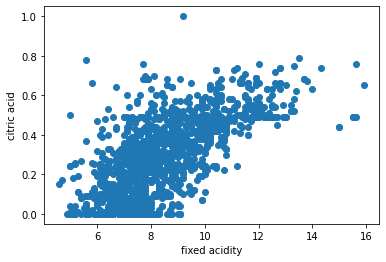

In [16]:

scatter('fixed acidity', 'citric acid')

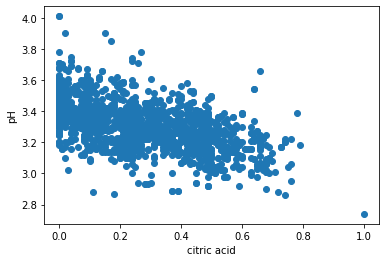

In [17]:

scatter('citric acid', 'pH')

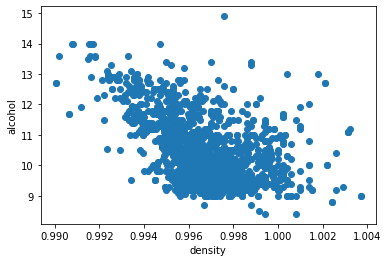

In [18]:
scatter('density','alcohol')

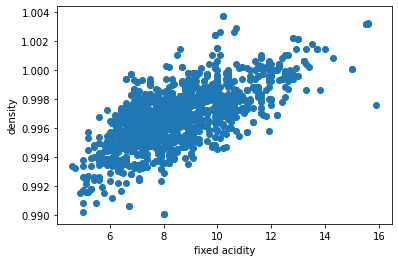

In [19]:
scatter('fixed acidity','density')

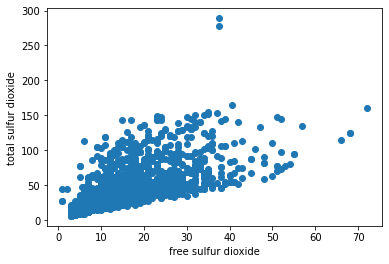

In [20]:
scatter('free sulfur dioxide','total sulfur dioxide')

Which range-normalized numerical attributes have the greatest sample covariance?

In [ ]:
df_range_normalized = pd.DataFrame(get_range_norm(df_orig.to_numpy()), columns=df_orig.columns)
covar_matrix = get_cov_matrix(df_range_normalized)

# mask used later to get the upper diagonal values from our matrices
triu_mask = np.zeros_like(covar_matrix, dtype=np.bool_)
triu_mask[np.triu_indices_from(covar_matrix, k=1)] = True

# set diagonals to -inf so we only get max of off-diagonals

# take the flat index to the array,
# get the indicies for each attribute,
# then return the labels for each attribute
covar_flat_idx = np.where(triu_mask, covar_matrix, -math.inf).argmax()
covar_shape_idx = np.unravel_index(covar_flat_idx, df_range_normalized.shape)
[covar_label1, covar_label2] = [df_range_normalized.columns[i] for i in covar_shape_idx]
covar_label1, covar_label2

What is their sample covariance? Create a scatter plot of these range-normalized attributes.

In [ ]:
covar_matrix[covar_shape_idx]

In [ ]:
x = df_range_normalized[covar_label1]
y = df_range_normalized[covar_label2]
plt.xlabel(covar_label1)
plt.ylabel(covar_label2)
plt.scatter(x, y)

Which Z-score-normalized numerical attributes have the greatest correlation? What
is their correlation? Create a scatter plot of these Z-score-normalized attributes.

In [ ]:
df_standard_normalized = pd.DataFrame(data=get_standard_norm(df_orig.to_numpy()), columns=df_orig.columns)
df_standard_normalized.to_numpy()

# same thing as the covariance, just with correlation
# correlation matrix is just covariance matrix of the z-score-normalized data
corr_matrix = get_cov_matrix(df_standard_normalized)

corr_flat_idx = np.where(triu_mask, corr_matrix, -math.inf).argmax()
corr_shape_idx = np.unravel_index(corr_flat_idx, df_standard_normalized.shape)
[corr_label1, corr_label2] = [df_standard_normalized.columns[i] for i in corr_shape_idx]

corr_label1, corr_label2

In [ ]:
x = df_standard_normalized[corr_label1]
y = df_standard_normalized[corr_label2]
plt.xlabel(corr_label1)
plt.ylabel(corr_label2)
plt.scatter(x, y)

Which Z-score-normalized numerical attributes have the smallest correlation? What
is their correlation? Create a scatter plot of these Z-score-normalized attributes.

In [ ]:
corr_flat_idx = np.where(triu_mask, corr_matrix, math.inf).argmin()
corr_shape_idx = np.unravel_index(corr_flat_idx, df_standard_normalized.shape)
[corr_label3, corr_label4] = [df_standard_normalized.columns[i] for i in corr_shape_idx]

(corr_label3, corr_label4)

In [ ]:
x = df_standard_normalized[corr_label3]
y = df_standard_normalized[corr_label4]
plt.xlabel(corr_label3)
plt.ylabel(corr_label4)
plt.scatter(x, y)

How many pairs of features have correlation greater than or equal to 0.5?


In [ ]:
df_copy = df_orig.copy()
columns = df_copy.columns
column_check = {x : False for x in columns}
for column_1 in columns:
    for column_2 in columns:
        if column_1 == column_2 or not column_check[column_2]:
            continue
        # reset df because I don't understand references
        df_copy = df_orig.copy()
        print(f'Columns -> {column_1} - {column_2} -> correlation: {get_corr(df_copy[column_1], df_copy[column_2])}')
    column_check[column_1] = True

**No pairs of features have a correlation of >= 0.5.**

How many pairs of features have negative sample covariance?


In [ ]:
np.count_nonzero(covar_matrix[triu_mask] < 0)

What is the total variance of the data?


In [ ]:
def get_total_var(arr):
    vec_var = get_var(arr)
    return vec_var.sum()
df_copy3 = df_orig.copy()
get_total_var(df_copy3.to_numpy())

What is the total variance of the data, restricted to the five features that have the
greatest sample variance?

In [ ]:
vec_var = get_var(df_orig.to_numpy())
greatest_5 = vec_var.argsort(0)[-5:]
vec_var[greatest_5].sum()